# Exploring Hacker News Posts

[Hacker News](https://news.ycombinator.com/) is a popular forum focused on technology. We want to know which posts generate the most comments. Users can "Ask HN" questions or "Show HN" interesting things. Which type of post generates more comments? Does posting at a certain time generate more comments?

To perform this analysis, we looked at Hacker News posts between September 26, 2015, and September 26, 2016. You can find the information about and a download of the data [here](https://www.kaggle.com/hacker-news/hacker-news-posts).

## -+-+-+-+-+-Using pandas-+-+-+-+-+-

In [1]:
# import packages and disable certain warnings
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# read in dataset and explore 
hn_df = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')

print(hn_df.info())
print(hn_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB
None
         id                                              title  \
0  12579008  You have two days to comment if you want stem ...   
1  12579005                         SQLAR  the SQLite Archiver   
2  12578997  What if we just printed a flatscreen televisio...   
3  12578989                                  algorithmic music   
4  12578979  How the Data Vault Enables the Next-Gen Data W...   

                                                 u

## Prep the dataset for plotting

* Add "Ask HN"/"Show HN" label
* Add creation hour
* Get average comments per label per creation hour

In [3]:
# add ask or show labels to indicated the type of post

# why doesn't this work? come back to it
# hn_df['Ask or Show'] = None
# hn_df[hn_df['title'].str.startswith('Ask HN')]['Ask or Show'] = 'Ask HN'
# hn_df[hn_df['title'].str.startswith('Show HN')]['Ask or Show'] = 'Show HN'

len1 = len(hn_df)

ask_df = hn_df[hn_df['title'].str.startswith('Ask HN')]
ask_df['Ask or Show'] = 'Ask HN'

show_df = hn_df[hn_df['title'].str.startswith('Show HN')]
show_df['Ask or Show'] = 'Show HN'

other_df = hn_df[(~hn_df.index.isin(ask_df.index)) & (~hn_df.index.isin(show_df.index))]

hn_df = pd.concat([ask_df, show_df, other_df])

if len(hn_df) != len1:
    print('ERROR: Adding ask/show labels changed the df length')
    1/0

print(hn_df['Ask or Show'].value_counts())

Show HN    10150
Ask HN      9122
Name: Ask or Show, dtype: int64


In [4]:
# add the creation hour

hn_df['Creation Hour'] = hn_df['created_at'].apply(lambda x: int(dt.strftime(dt.strptime(x, '%m/%d/%Y %H:%M'), '%H')))


In [5]:
# create summary table with average number of comments per hour per label

hn_sum_df = hn_df[['Ask or Show', 'Creation Hour', 'num_comments']].groupby(['Ask or Show', 'Creation Hour']).mean().reset_index()
print(hn_sum_df.sort_values(by='num_comments', ascending=False))


   Ask or Show  Creation Hour  num_comments
15      Ask HN             15     28.676471
13      Ask HN             13     16.350679
12      Ask HN             12     12.380117
2       Ask HN              2     11.137546
10      Ask HN             10     10.684397
4       Ask HN              4      9.743802
14      Ask HN             14      9.707031
17      Ask HN             17      9.449744
8       Ask HN              8      9.190661
11      Ask HN             11      9.012903
22      Ask HN             22      8.819372
5       Ask HN              5      8.794258
20      Ask HN             20      8.749020
21      Ask HN             21      8.720930
3       Ask HN              3      7.974074
18      Ask HN             18      7.954248
16      Ask HN             16      7.717993
0       Ask HN              0      7.575251
1       Ask HN              1      7.407801
19      Ask HN             19      7.176044
7       Ask HN              7      7.040000
36     Show HN             12   

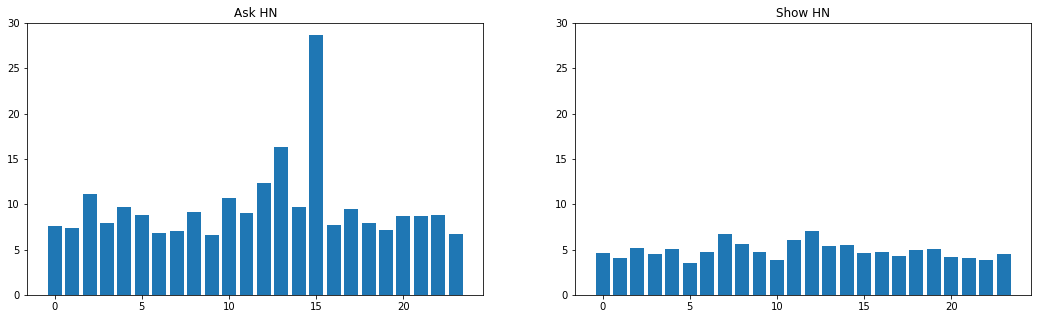

In [6]:
# plot the average number of comments by label by hour

# split the df into ask and show
ask_df = hn_sum_df[hn_sum_df['Ask or Show'] == 'Ask HN']
show_df = hn_sum_df[hn_sum_df['Ask or Show'] == 'Show HN']

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,5)

# make the charts the same scale
ymax = 30

ax1.title.set_text('Ask HN')
ax1.set_ylim([0, ymax])
ax1.bar(ask_df['Creation Hour'], ask_df['num_comments'])

ax2.title.set_text('Show HN')
ax2.set_ylim([0, ymax])
ax2.bar(show_df['Creation Hour'], show_df['num_comments'])

plt.show()


## Conclusions

"Ask HN" posts created between 15:00 and 16:00 ET receive far more comments on average than either "Ask HN" or "Show HN" posts created during any other hour. If we want to garner the most comments possible, we should create an "Ask HN" post between 14:00 and 15:00 CT.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## -+-+-+-+-+-Using the Dataquest instructions-+-+-+-+-+-

In [7]:
# import packages and initialize variables

from csv import reader
import datetime as dt

headers_already_removed = False

In [8]:
# read in the datasets and separate headers

def read_file_as_lists(csv_file):
    opened_file = open(csv_file)
    read_file = reader(opened_file)
    data = list(read_file)
    
    return data

hn = read_file_as_lists('HN_posts_year_to_Sep_26_2016.csv')
print(hn[:5])

if not headers_already_removed:
    headers = hn[0]
    hn = hn[1:]
    headers_already_removed = True

print(headers)
print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']]
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015

## Analysis

On average, "Ask HN" posts receive 10.4 comments, while "Show HN" posts receive only 4.9 comments. Therefore, we will only analyze the timing of the "Ask HN" posts.

"Ask HN" posts created between 15:00 and 16:00 ET receive the most comments on average: 28.7. Posts created between 13:00 and 14:00 ET receive the second most on average: only 16.3.


In [9]:
# separate posts into ask or show

ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

print('# Ask Posts')
print(len(ask_posts))
print('\n# Show Posts')
print(len(show_posts))
print('\n# Other Posts')
print(len(other_posts))

# Ask Posts
9139

# Show Posts
10158

# Other Posts
273822


In [10]:
# get the average number of comments for each type of post

def get_avg_num_comments(post_list):
    total_comments = 0
    cnt_posts = 0
    
    # sum the number of comments on each post (4th index)
    for post in post_list:
        total_comments += int(post[4])
        cnt_posts += 1
        
    avg_num_comments = total_comments / cnt_posts
    
    return avg_num_comments

avg_ask_comments = get_avg_num_comments(ask_posts)
avg_show_comments = get_avg_num_comments(show_posts)

print('Avg # Ask Comments')
print(avg_ask_comments)
print('\nAvg # Show Comments')
print(avg_show_comments)

Avg # Ask Comments
10.393478498741656

Avg # Show Comments
4.886099625910612


In [11]:
# get the average comments per hour for ask posts

result_list = []

# get a list of the time the post was created (6th index) and the number of comments (4th index) for each post
for post in ask_posts:
    result_list.append([post[6], int(post[4])])
    
# get the hour of each post and add the number of posts and the number of comments per hours to their respective dictionaries
counts_by_hour = {}
comments_by_hour = {}
for post in result_list:
    create_hour = dt.datetime.strftime(dt.datetime.strptime(post[0], '%m/%d/%Y %H:%M'), '%H')
    
    if create_hour in counts_by_hour:
        counts_by_hour[create_hour] += 1
        comments_by_hour[create_hour] += post[1]
    else:
        counts_by_hour[create_hour] = 1
        comments_by_hour[create_hour] = post[1]

avg_by_hour = []
for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])
    
print(avg_by_hour)
        

[['02', 11.137546468401487], ['01', 7.407801418439717], ['22', 8.804177545691905], ['21', 8.687258687258687], ['19', 7.163043478260869], ['17', 9.449744463373083], ['15', 28.676470588235293], ['14', 9.692007797270955], ['13', 16.31756756756757], ['11', 8.96474358974359], ['10', 10.684397163120567], ['09', 6.653153153153153], ['07', 7.013274336283186], ['03', 7.948339483394834], ['23', 6.696793002915452], ['20', 8.749019607843136], ['16', 7.713298791018998], ['08', 9.190661478599221], ['00', 7.5647840531561465], ['18', 7.94299674267101], ['12', 12.380116959064328], ['04', 9.7119341563786], ['06', 6.782051282051282], ['05', 8.794258373205741]]


In [12]:
# sort the results by hour

swap_avg_by_hour = []
for itm in avg_by_hour:
    swap_avg_by_hour.append([itm[1], itm[0]])
    
sorted_swap = sorted(swap_avg_by_hour, reverse=True)

print('Top 5 Hours for Ask Posts Comments')
for itm in sorted_swap[:5]:
    print('{}: {:.2f} average comments per post'.format(dt.datetime.strftime(dt.datetime.strptime(itm[1], '%H'), '%H:%M'), itm[0]))
    

Top 5 Hours for Ask Posts Comments
15:00: 28.68 average comments per post
13:00: 16.32 average comments per post
12:00: 12.38 average comments per post
02:00: 11.14 average comments per post
10:00: 10.68 average comments per post


## Conclusions

"Ask HN" posts receive more than double the number of comments on average as "Show HN" posts, and "Ask HN" posts created between 15:00 and 16:00 ET receive 75% more comments than those created during any other hour. If we want to garner the most comments possible, we should create an "Ask HN" post between 14:00 and 15:00 CT.